# DATATHON

### Mediante un $set$ de datos con las siguientes columnas:

- ID: identificador del registro de orden (valor entero).
- Warehouse_block: Almacén de distribución de donde salió la orden (A a F).
- Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).
- Customer_care_calls: Número de llamadas a atención al cliente que hubo por esa orden. (valores enteros del 2 al 7)
- Customer_rating: Puntaje del cliente (valores enteros 1 al 5).
- Cost_of_the_Product: Costo del producto (valor numérico entero de 96 a 310).
- Prior_purchases: Número de compras previas realizadas por el cliente (valor numérico entero de 2 a 10).
- Product_importance: Nivel de importancia del producto (low, medium, high).
- Gender: Género del comprador (F, M).
- Discount_offered: Porcentaje de descuento ofrecido por esa compra (valor numérico entero de 1 a 65):
- Weight_in_gms: Peso del paquete de la orden, en gramos (valor numérico entero de 1001 a 7846).
- Reached.on.Time_Y.N: Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo).

### Intentar generar un modelo con **SKLEARN**, el cual prediga lo máximo posible  si un paquete llegó a tiempo o no.

#### Para este caso se usa 4 librerías:
1. Pandas (Procesamiento de Tablas)
2. Matplotlib (Generación de gráficas)
3. seaborn (Mejoramiento gráfico de Matplotlib)
4. sklearn (Análisis estádistico y Análisis de Machine Learning)

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Explicando con más detalle lo importado a este **Notebook**:

### **Pipeline**: Nos ayuda a generar un proceso que debe seguir nuestro algoritmo de forma fácil.

### **PCA (Principal Component Analysis)**: Dado una matriz de covarianza obtenido del set de datos mediante autovalores y autovectores, es encontrar una nueva matriz covariante con valores diferentes a cero únicamente en la traza. con esto se encuentran autovectores ortogonales los cuales nos ayuda a transformar nuestros datos. Esto con el objetivo de encontrar nuevas dimensiones, las cuales podrán contener más información que con la matriz de covarianza original. Dado que alguna dimensión podrá contener más información, esto nos ayuda reducir la dimensionalidad, intentando que no se pierda la mayor de informacioón posible.

### **ColumnTransformer**: Dado el caso que se desea operar sobre ciertos columnas y no sobre todas como pasa con el pipeline O también si se desea hacer procesos paralelamente es util usar este objeto para hacer estos procesos.
### **GridSearchCV (Búsqueda exhaustiva en cuadrícula)**: La búsqueda de cuadrícula proporcionada por GridSearchCVgenera exhaustivamente candidatos a partir de una cuadrícula de valores de parámetros especificados con el param_grid parámetro.

### **StandardScaler**: Estandariza una columna o set de datos suponiendo una distrubución normal de los datos dado por la fórmula:
$$x'_{i}=\frac{x_{i}-\mu}{\sigma},$$
### siendo $x_{i}$ el valor original y $x_{i}'$ el valor estandarizado. Es de notar que $i$ es el i-ésimo dato de un conjunto de datos de tamaño $N$.
### Donde $\mu$ es la media aritmética y $\sigma$ es la desviación estándar, para este caso denotadas de la siguiente forma: 
$$\mu=\frac{1}{N}\sum_{i=1}^{N}x_{i}$$
$$\sigma²=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^2$$
### **OneHotEncoder**:  transforma cada característica categórica con $n$ categorias posibles en $n$ características binarias, siendo una de ellas 1 y todas las demás 0.
### **PolynomialFeatures**: Esta variable mezcla columnas de con un grado polinomial escogido. por ejemplo: sea un set de datos $Y$ con dos columnas $y_{1}$ y $y_{2}$ vamos a generar nuevas columnas con la combinación de las dos. Escogemos el grado de polinomio: $2$ las nuevas columnas del set de datos $Y$ son $1$, $y_{1}$, $y_{2}$, $y_{1}y_{2}$, $y_{1}^2$ y $y_{2}^2$, bajo esta logica notamos que rige desde el teorema multinomial sumado una unidad, es decir:

$$polinomio = (y_{1}+y_{2}+...+y_{p})^M+1$$

$$polinomio = 1+\sum_{i_{1}+i_{2}+...+i_{p}=M}\binom{M}{i_{1}, i_{2},...,i_{p}}\prod_{1<t<p}x_{t}^{k_{t}}$$
### siendo $p$ la cantidad de columnas, el grado del polinomio $M$, $i_{t}$las combinaciones de enteros no negativos posibles menores a $M$.
### **confusion_matrix**: Genera una matriz de confusión minimo con 4 elementos: Verdadero Positivo, Falso Positivo, Falso Negativo y Verdadero Negativo.
### **ConfusionMatrixDisplay**: Genera un mapa de calor minimo con 4 píxeles de la matriz de confusión.
### **classification_report**: Genera una tabla en pantalla con ciertas relaciones estadisticas importantes a la hora de generar un modelo de clasificación. Dichas estadisticas importantes son:
1. Presición: Denota la fracción de instancias relevantes entre las instancias recuperadas es decir:

$$presición=\frac{verdadero\_positivo}{verdadero\_positivo+falso\_positivo}$$

2. Recuperación: Denota la fraccipon de instancias relevantes que se recuperaron, es decir:

$$recuperacion=\frac{verdadero\_positivo}{verdadero\_positivo+falso\_negativo}$$

3. puntuación F: Denota la media armonica de la recuperación y la precisión, es decir:

$$F=2*\frac{presicion*recuperacion}{presicion+recuperacion}$$

3. Accuracy: muestra la presición total entre la certeza de obtener buenos datos de verdaderos positivos y verdaderos negativos teniendo en cuenta el error de obtener falsos positivo y falsos negativos, es decir:

$$Accuracy = \frac{verdadero\_positivo+verdadero\_negativo}{verdadero\_positivo+verdadero\_negativo+falso\_positivo+falso\_negativo}$$

Si $falso\_positivo$ y $falso\_negativo$ son igual a cero, entonces se tiene que:

$$Accuracy = \frac{verdadero\_positivo+verdadero\_negativo}{verdadero\_positivo+verdadero\_negativo}$$
$$Accuracy = 1$$
### **train_test_split**: Este método puede partir los datos dependiendo un corte posible lo mas uniforme posible.
### **MLPClassifier**: Método de Backpropagation para poder relacionar los datos con unos parametros dados así poder predecir con distintos datos en el futuro.

### $Backpropagation$ es un método el cual mediante datos de entrada se entrena una red neuronal se compara su salida con datos que se esperan que sean los predecidos y luego se va para atrás para calibrar los hiperparámetros. La siguiente imagen es una construcción de una red neuronal.
![alt text](images/backpropagation.jpg)

### Donde cada circunferencia denota una neurona, $w_{ij}$ denota cada peso de cada neurona, $b_{j}$ los bias. Estos dos parámetros anteriores son los que se van calibrando mediante el backpropagation. Cada columna de neuronas es llamada capa oculta. Cada dato de entrada $z_{i}$ a una neurona correspondiente es multiplicada por su peso correspondiente $w_{ij}$ siendo $j$ la $j$-esima neurona y sumandole el parámetro bias, como si fuera una función con tendencia linea. luego de todos, el procedimiento con todos los $z_{i}$ que interactuan con la nuerona, dicho resultado es sumado, dando como resultado la funcion $a_{j}$ como se muestra en la imagen. para finalmente dicha función entrar en una función $h$ llamada función de activación. Dicho mapeo corresponde a:
$$h:\mathbb{R} \to \mathbb{R}$$
### Es decir que convierte el valor $a_{j}$ en un nuevo valor del mismo espacio de los reales, dicho mapeo convierte $a_{j}$ en un nuevo $z_{j}$ que interactuará con la siguiente capa. Tal que la salida última es una mapeo progresivo constante con la función de activación.

### en sklearn existen 4 tipos de funciones de activacion:
### 1. Función identidad: No modifica el valor de $a_{j}$ es decir que la función de identidad es:
$$f(x)=x$$
### 2. Función logistica: Modifica el valor de $a_{j}$ y lo mapea en el espacio $[-1,1]$, está definida de la siguente forma:
$$f(x)=\frac{1}{1+e^{-x}}$$
### 3. Función tangente hiperbólica: Función que mapea también en el espacio $[-1,1]$, está definida de la siguiente forma:
$$f(x)=tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$
### 4. ReLU: FUnción que mapea $a_{j}$ al espacio $[0,\infty]$ definida de la siguente forma:
$$
    f(x)= 
\begin{cases}
    x,& \text{if } x > 0\\
    0,              & \text{para otros casos.}
\end{cases}
$$

### Para la actualización de los parametros $w_{ij}$ y $b_{j}$ que intentan minimizar el error $\epsilon$ correspondiente al error medio cuadrático que puede ser derivado desde el $Likelihood$ tomando que los errores se comportan como una distribución normal, se procede mediante métodos de descenso por gradiente.

### Tenemos en cuenta que para minimizar el error tenemos que actualizar los parámetros y es posible por descenso por gradiente de la siguente forma:
$$\theta_{t+1}= \theta_{t} - \alpha \nabla \epsilon  $$
### siendo $\theta$ la matriz con los hiperparámetros de la red neuronal y $\alpha$ la rata de aprendizaje.
### para mejorar la minimización usaremos el metodo ADAM de descenso por gradiente definido de la siguente forma:
$$m_{t}=0.9m_{t-1}+(1-0.9)\nabla \epsilon$$

$$v_{t}=0.9v_{t-1}+(1-0.999)(\nabla \epsilon)²$$

$$\hat{m}_{t}=\frac{m_{t}}{1-0.9^t}$$

$$\hat{v}_{t}=\frac{v_{t}}{1-0.999^t}$$

$$\theta_{t+1}= \theta_{t} - \frac{\alpha}{\sqrt{\hat{v}_{t}}+\beta} \hat{m}_t  $$

### Siendo $\beta =10^{-8}$

## Subiendo datos de entrenamiento y cantidad de datos
### En este caso subimos los datos de excel, el cual contiene las 12 columnas antes mencionadas mediante el la función pd.read_excel() de pandas y analizamos la cantidad de datos y columnas con el método shape, como se muestra acontinuación:

In [72]:
datos = pd.read_excel("data/E-Commerce_train.xlsx")

In [73]:
datos.shape

(8999, 12)

## MIRANDO COLUMNAS
### con el método columns se puede mirar el nombre de todas las columnas de la siguente forma:

In [74]:
datos.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Mirando datos nulos
### para enpezar primero nos cercioramos de que no hayan valores nulos mediante la función isna(), luego sumamos todos los valores nulos por cada columna con la función sum() de la siguente forma: 

In [75]:
datos.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Como se observa arriba dicho set de datos no contiene ningún valor nulo.

## Analizando tipo de dato y cantidad de datos
### En este caso analizaremos los tipos de datos si son categóricos o numéricos y estos cuántas veces se repiten mediante la función value_counts() 

In [76]:
datos.ID.value_counts()

1       1
6003    1
5997    1
5998    1
5999    1
       ..
2995    1
2994    1
2993    1
2992    1
8999    1
Name: ID, Length: 8999, dtype: int64

In [77]:
datos.Warehouse_block.value_counts() #recordar

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [78]:
datos.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [79]:
datos.Customer_care_calls.value_counts()

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [80]:
datos.Customer_rating.value_counts()

3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [81]:
datos.Cost_of_the_Product.value_counts()

245    86
260    85
266    82
254    80
264    78
       ..
96      4
107     4
122     3
125     3
288     3
Name: Cost_of_the_Product, Length: 215, dtype: int64

In [82]:
datos.Prior_purchases.value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [83]:
datos.Product_importance.value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [84]:
datos.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [85]:
datos.Weight_in_gms.value_counts()

1005    10
4883     9
4343     9
5783     9
4632     9
        ..
5094     1
2077     1
3817     1
5020     1
5648     1
Name: Weight_in_gms, Length: 3918, dtype: int64

In [86]:
datos.Discount_offered.value_counts()

6     662
2     652
3     643
1     639
10    636
     ... 
65     36
26     36
42     35
25     34
30     34
Name: Discount_offered, Length: 65, dtype: int64

### De lo anterior observamos que existen 4 columnas con elementos categoricos que tenemos que transformar a formato binario en el futuro con el método **OneHotEncoder**.

## Subiendo datos de TEST y conteo
### hacemos lo mismo como hicimos en el apartado anterior en este caso con el set de datos que no contienen una última columna Reached.on.Time_Y.N que es la asociada al si el pedido llegó a tiempo o no.
### Usamos la misma función pd.read_excel() para subir los datos a esta notebook, miramos su tamaño con shape y finalmente analizamos si hay valores nulos, los cuales, no contiene ninguno.

In [87]:
datostest = pd.read_excel("data/E-Commerce_test.xlsx")

In [88]:
datostest.shape

(2000, 11)

In [89]:
datostest.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

## Comparación de Histogramas y diagramas de dispersión.

### Antes de generar nuestro modelo para predecir los pedidos a tiempo es importante hacer un análisis cualitativo de la calidad de los datos mediante histogramas y diagramas de dispersión.

### En este caso usaremos la función pairplot() de seaborn para obtener los histogramas de cada columna y los diagramas de dispersión entre variables. los parámetros de la función pairplot() que usaremos son los iguentes; $hue$: separa los datos dado una columna que sea de tipo categorica; $diag_hist$: para escoger el tipo de graficas que se quieren, en este caso escogeremos histogramas de tipo barra y diagramas de dispersión tipo scatter.

### Haremos una comparación de pairplot de los datos de entrenamiento y los datos a predecir para ver regularidades y calidad de datos. EN este caso guardaremos las imagenes en formato png para poder ser detalladas fuera de este notebook. Los pairplots son los siguientes:

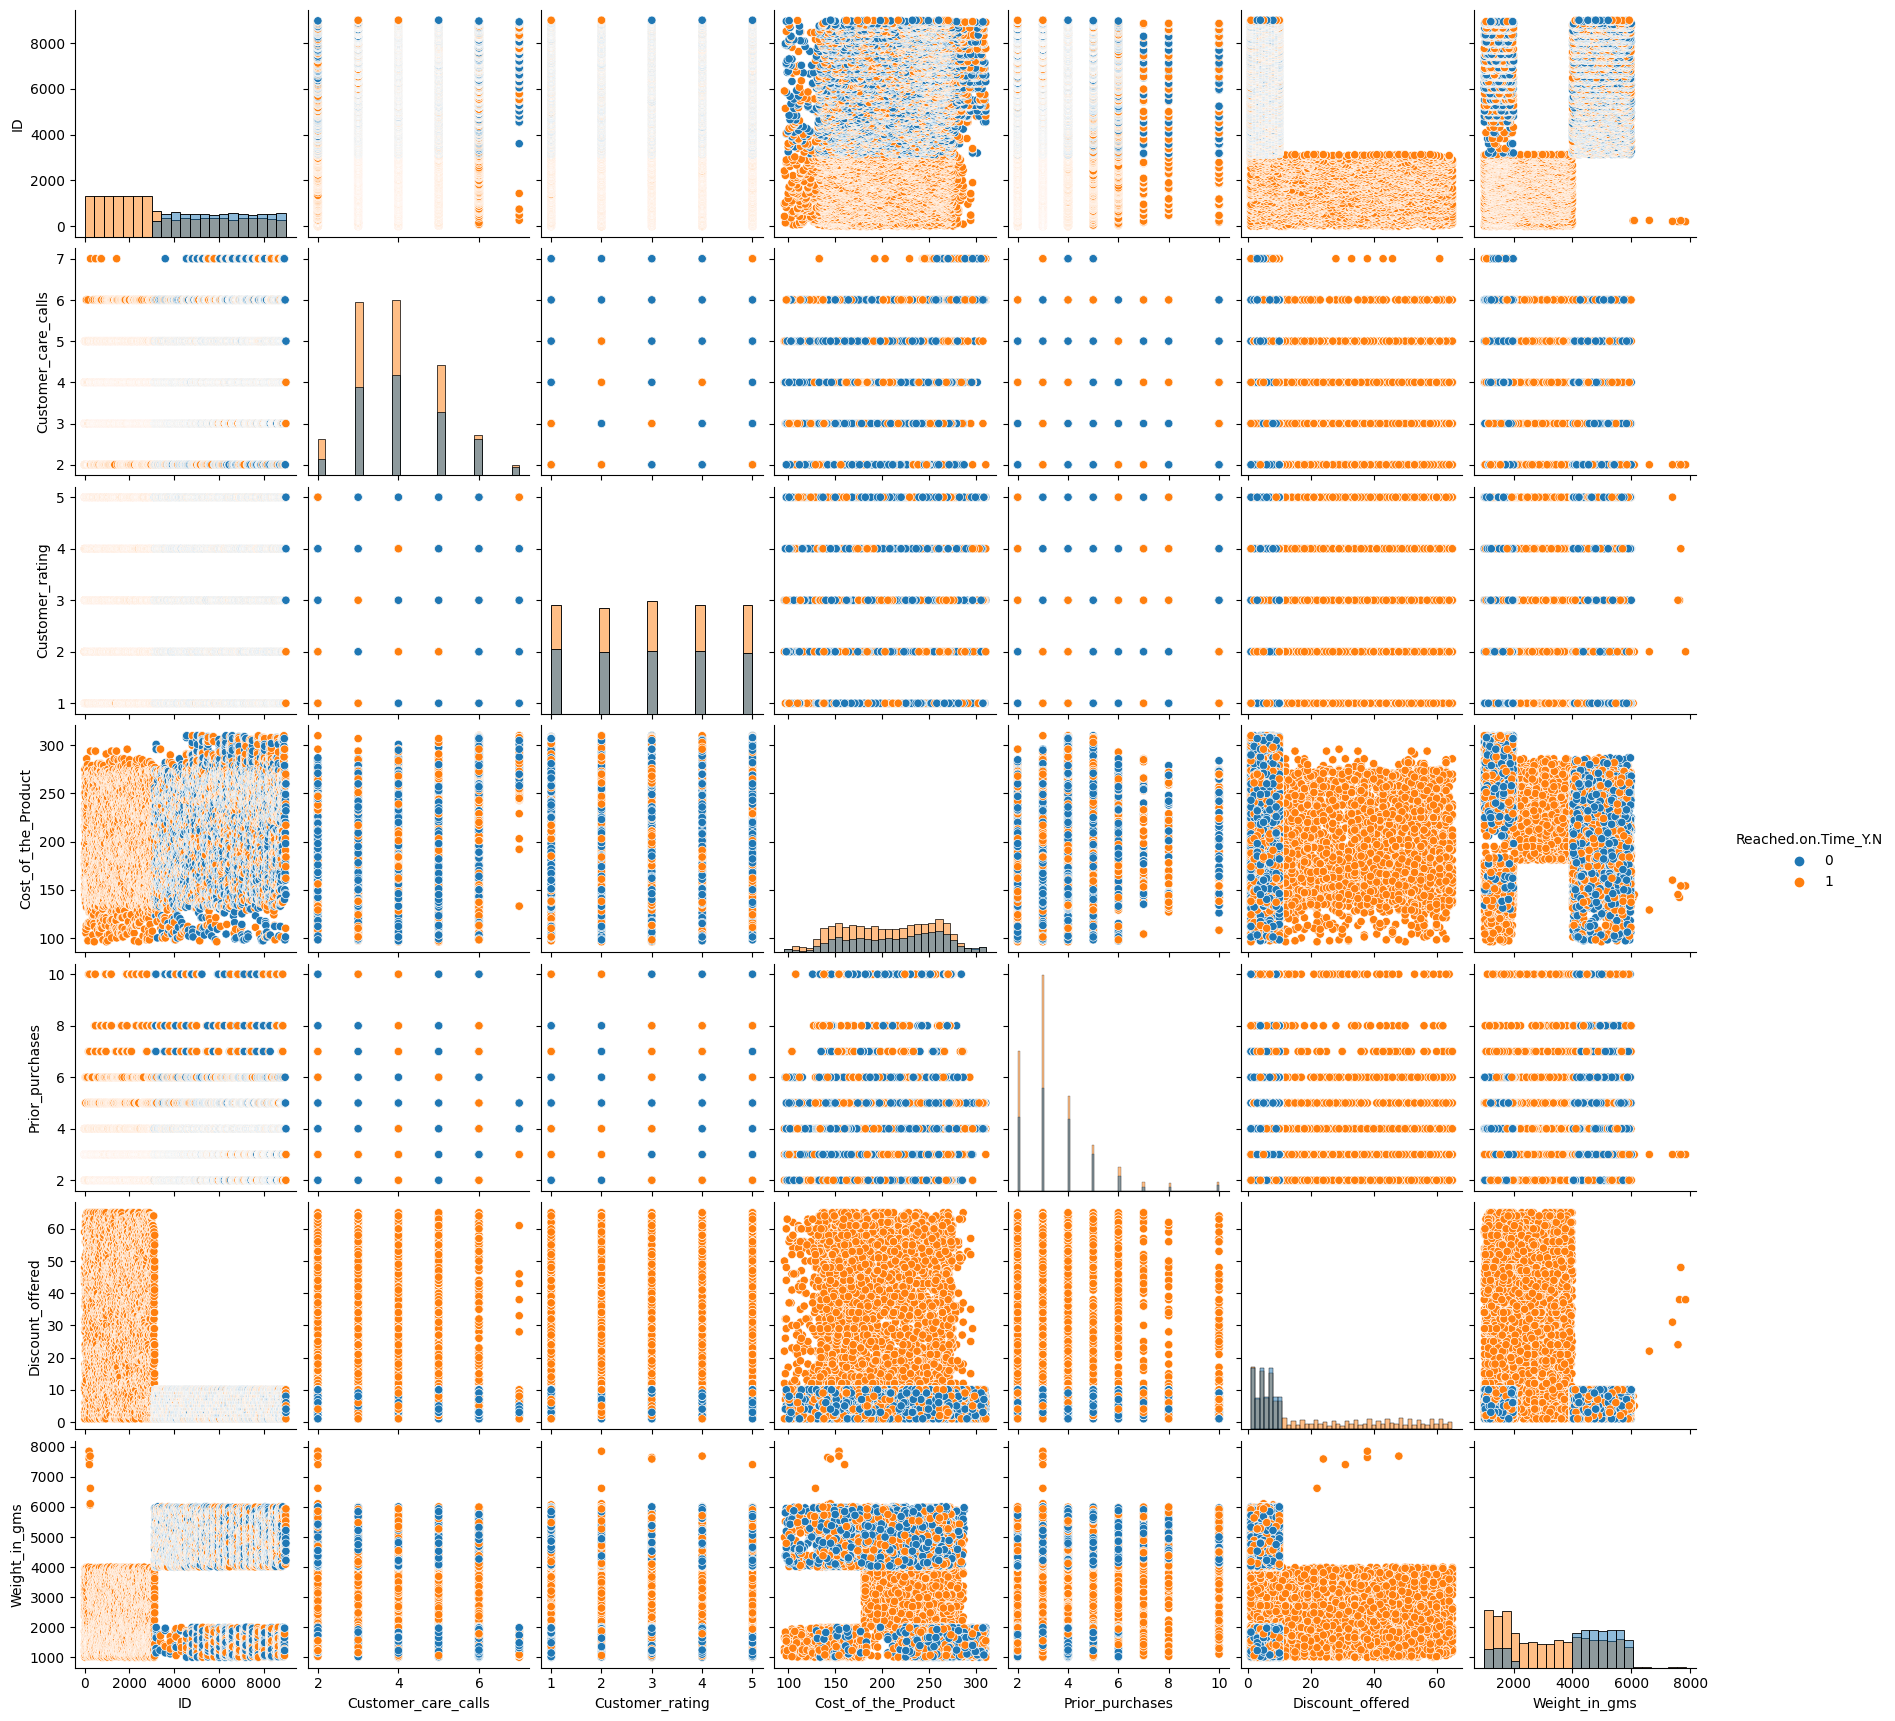

In [93]:
sns.pairplot(datos, hue = "Reached.on.Time_Y.N",  diag_kind="hist")
plt.savefig('distribucion_bivariada.png')
plt.show()

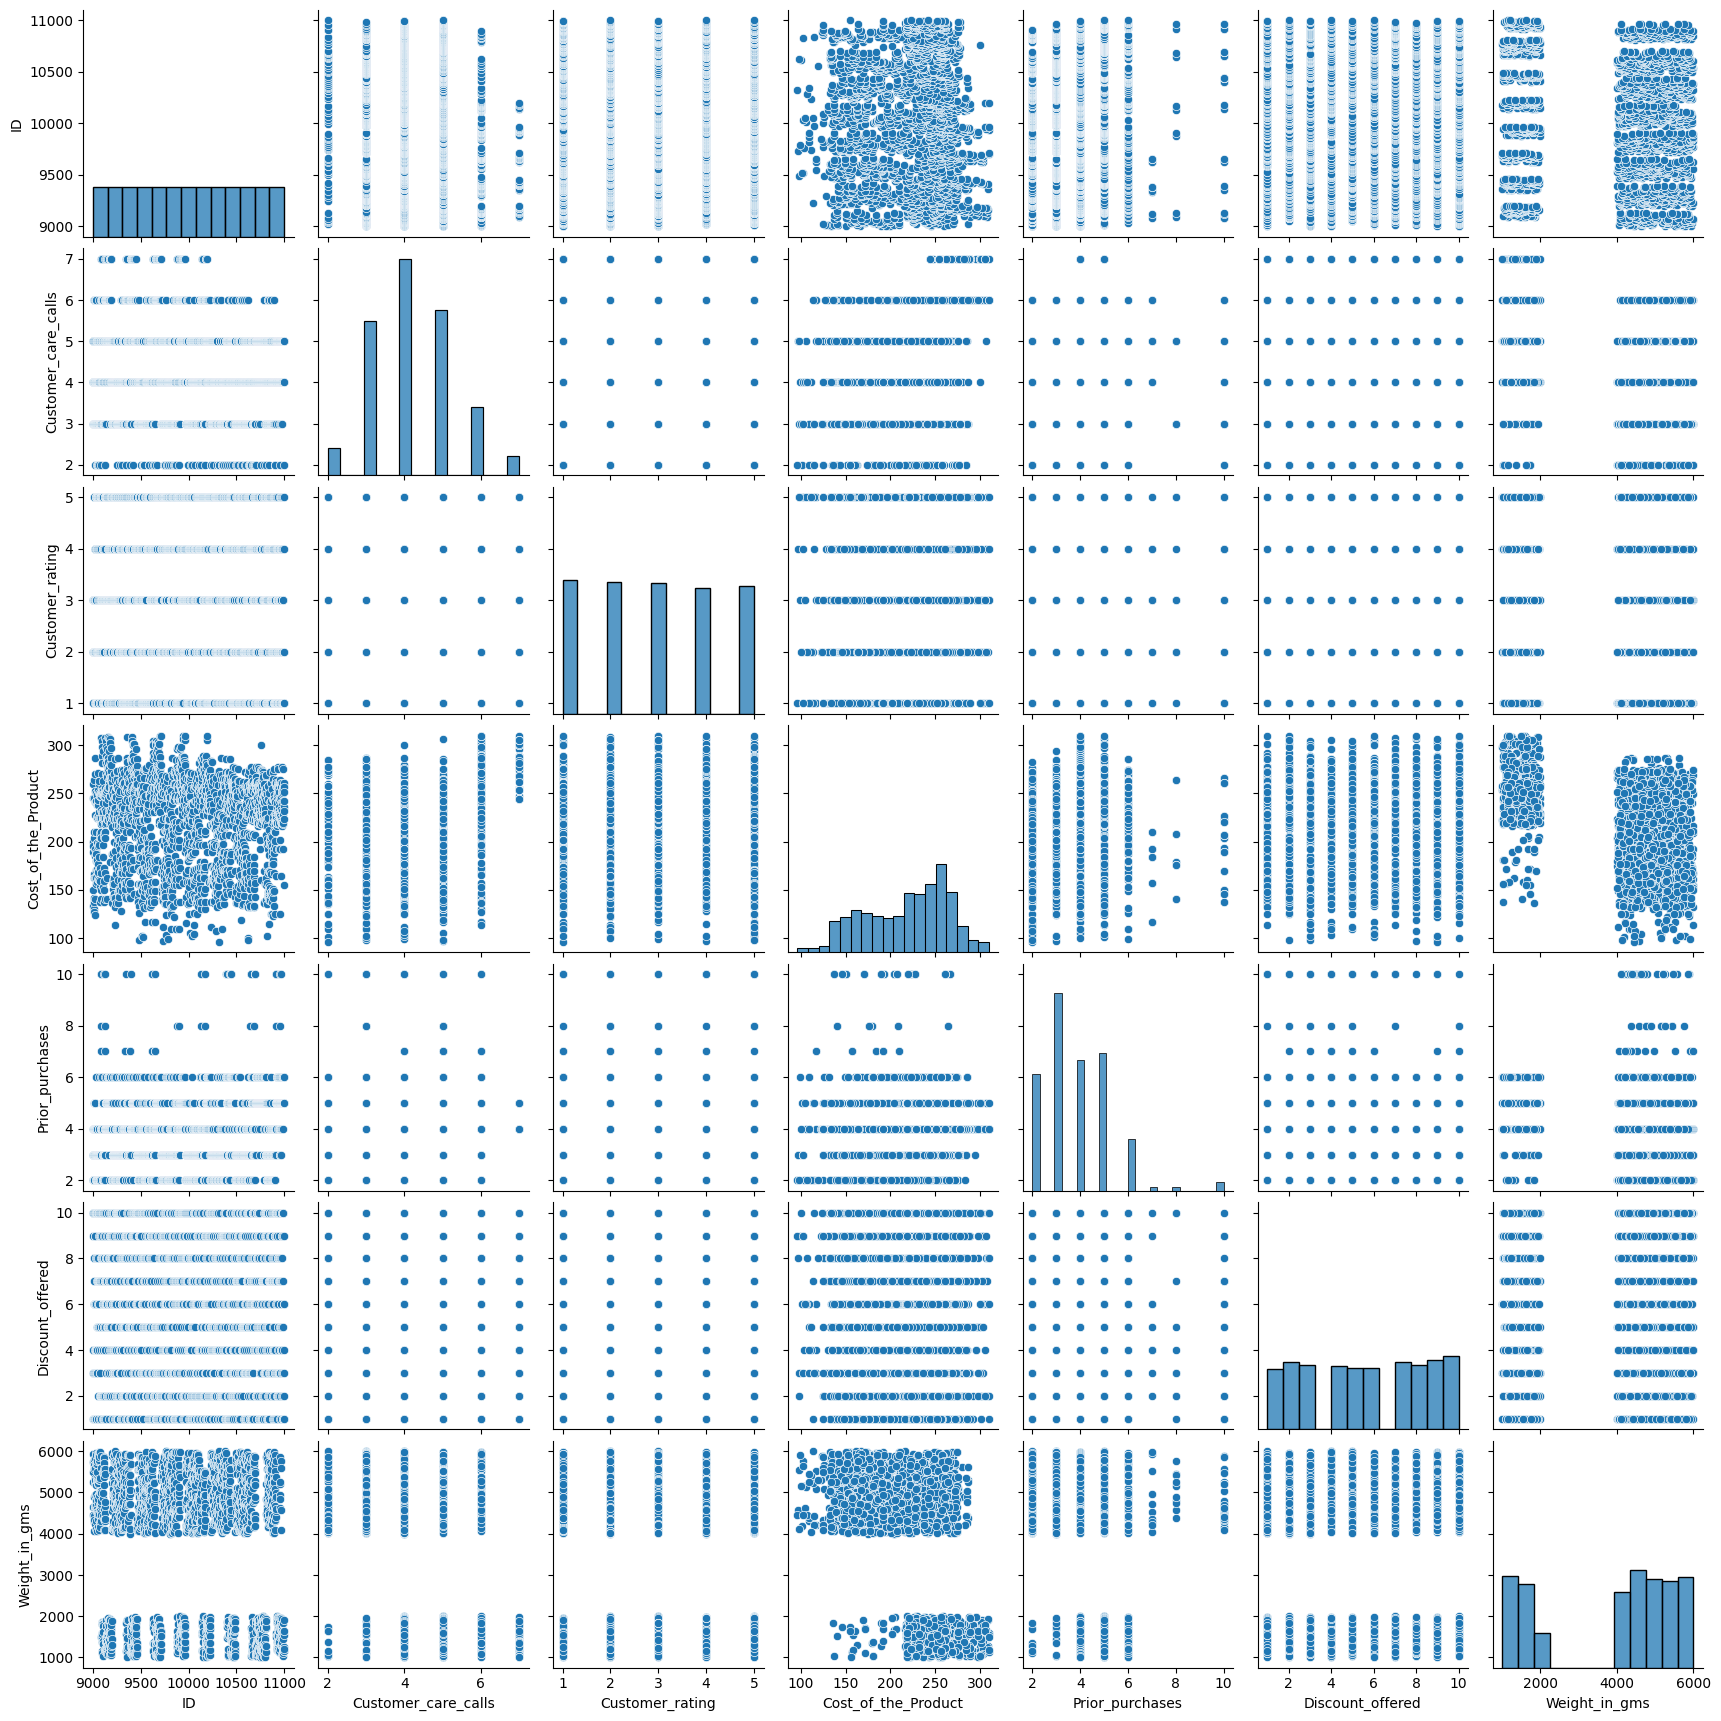

In [94]:
sns.pairplot(datostest, diag_kind="hist")
plt.savefig('distribucion_bivariada_test.png')
plt.show()

### Desde la prespectiva de la calidad del dato observamos que algunos histogramas tiene comportamientos de distribuciónes binomiales desde la perspectiva discreta y otros tienen comportamiento de distribución uniforme. Es importante destacar que para las gráficas de dispersión de los datos de entrenamiento encontramos cosas atípicas, es decir, manipulación de los datos luego de las mediciónes como se observa en la gráfica ID vs Cost_of_the_producto, se nota que cortaron y luego repegaron los datos en la region aproximada de 150 y 250. Es posible, como veremos mas adelante, dicho "manoseo" de los datos hace que la dependencia entre datos sea quebrada, Es decir si hablamos de un evento, no es posible calcular la dependencia de eventos dado a esta manipulación de los datos y tmabién lleve a que la causalidad de los datos esté rota (sin hablar de la correlación que no se verá en este caso ya que ninguna tiene algun tipo de correlación. También se ven cortes en cierta parte de los datos que no son posibles por el fenómeno en sí de los datos si no del manipulador posterior.

### Comparando los dos pairplot observamos que entre la región 2000g y 4000g de la columna weight_in_gms, no son necesarios a la hora de predecir la salida para los datos de test. Tampoco son necesarios los datos superiores a 6000g de la columna weight_in_gms. También observamos que tampoco son necesarios los datos superiores al 60% en Discount_offered. Estos cortes son necesarios debido a que si hipoteticamente supieramos el valor de accuracy en los datos de test, si comparamos el accuracy de los datos de test y de los datos de entrenamiento estos no serian aproximadamente los mismos, ya que los datos de entrenamiento encontrarian efectivamente que el pedido fue logrado a tiempo para un descuento superior a al 60% y entre el rengo de peso antes mencionado. EL objetivo es tener un valor visual de accuracy que lo más parecido al del test y mas si no sabemos cual es el valor real del accuracy del test ab initio (desde el principio). 

## Cortes en los datos

### Dado lo anterior generaremos los siguientes cortes empezando con la columna de descuentos. calcularemos el valor maximo de descuento en la columna de test de la siguente forma:

In [96]:
print("train = ", datos.Discount_offered.max())
print("test = ", datostest.Discount_offered.max())

train =  65
test =  10


### Luego discriminamos los datos a escoger menores al valor maximo de descuento de la tabla test en la tabla entrenamiento con la función loc() colocando la condición como se muestra a continuación:

In [29]:
datos = datos.loc[datos.Discount_offered <= datostest.Discount_offered.max()]

### con esto pasamos de tener 8999 datos a 6352 datos como se muestra a continuación:

In [31]:
datos.shape

(6352, 12)

### Luego procedemos a cortar los datos en la mitad de pesos en gramos mediante la siguiente metodología:
### primero cogemos solo los datos de test menores a 3000 y obtenemos su máximo, este resultado es el mnimo corte que hacer en los datos de entrenamiento.
### Luefo cogemos solo los datos de test mayores a 3000 y obtenemos su minimo, este resultado es el mínimo corte que hacer en los datos de entrenamiento.
### Finalmente aplicamos el corte en los datos con la función loc y una condición dentro usando el simbolo | denotando la condición or como se muestra a continuación:

In [99]:
minimo = datostest.loc[datostest.Weight_in_gms <3000].Weight_in_gms.max()

In [100]:
maximo = datostest.loc[datostest.Weight_in_gms >3000].Weight_in_gms.min()

In [101]:
datos = datos.loc[(datos.Weight_in_gms >= maximo) | (datos.Weight_in_gms <= minimo)]

## Tal que finalmente obtenemos los siguientes datos resultantes:

In [38]:
print(datos.shape[0], datostest.shape[0]) 

6083 2000


Es de notar que la relación de datos es de aproximadamente del 33.3%

### Con esto obtenemos un pairplot muy parecido al al pairplot de los test. Es de destacar que no observaríamos algo concluyente de un diagrama de dispersión de los datos categóricos.

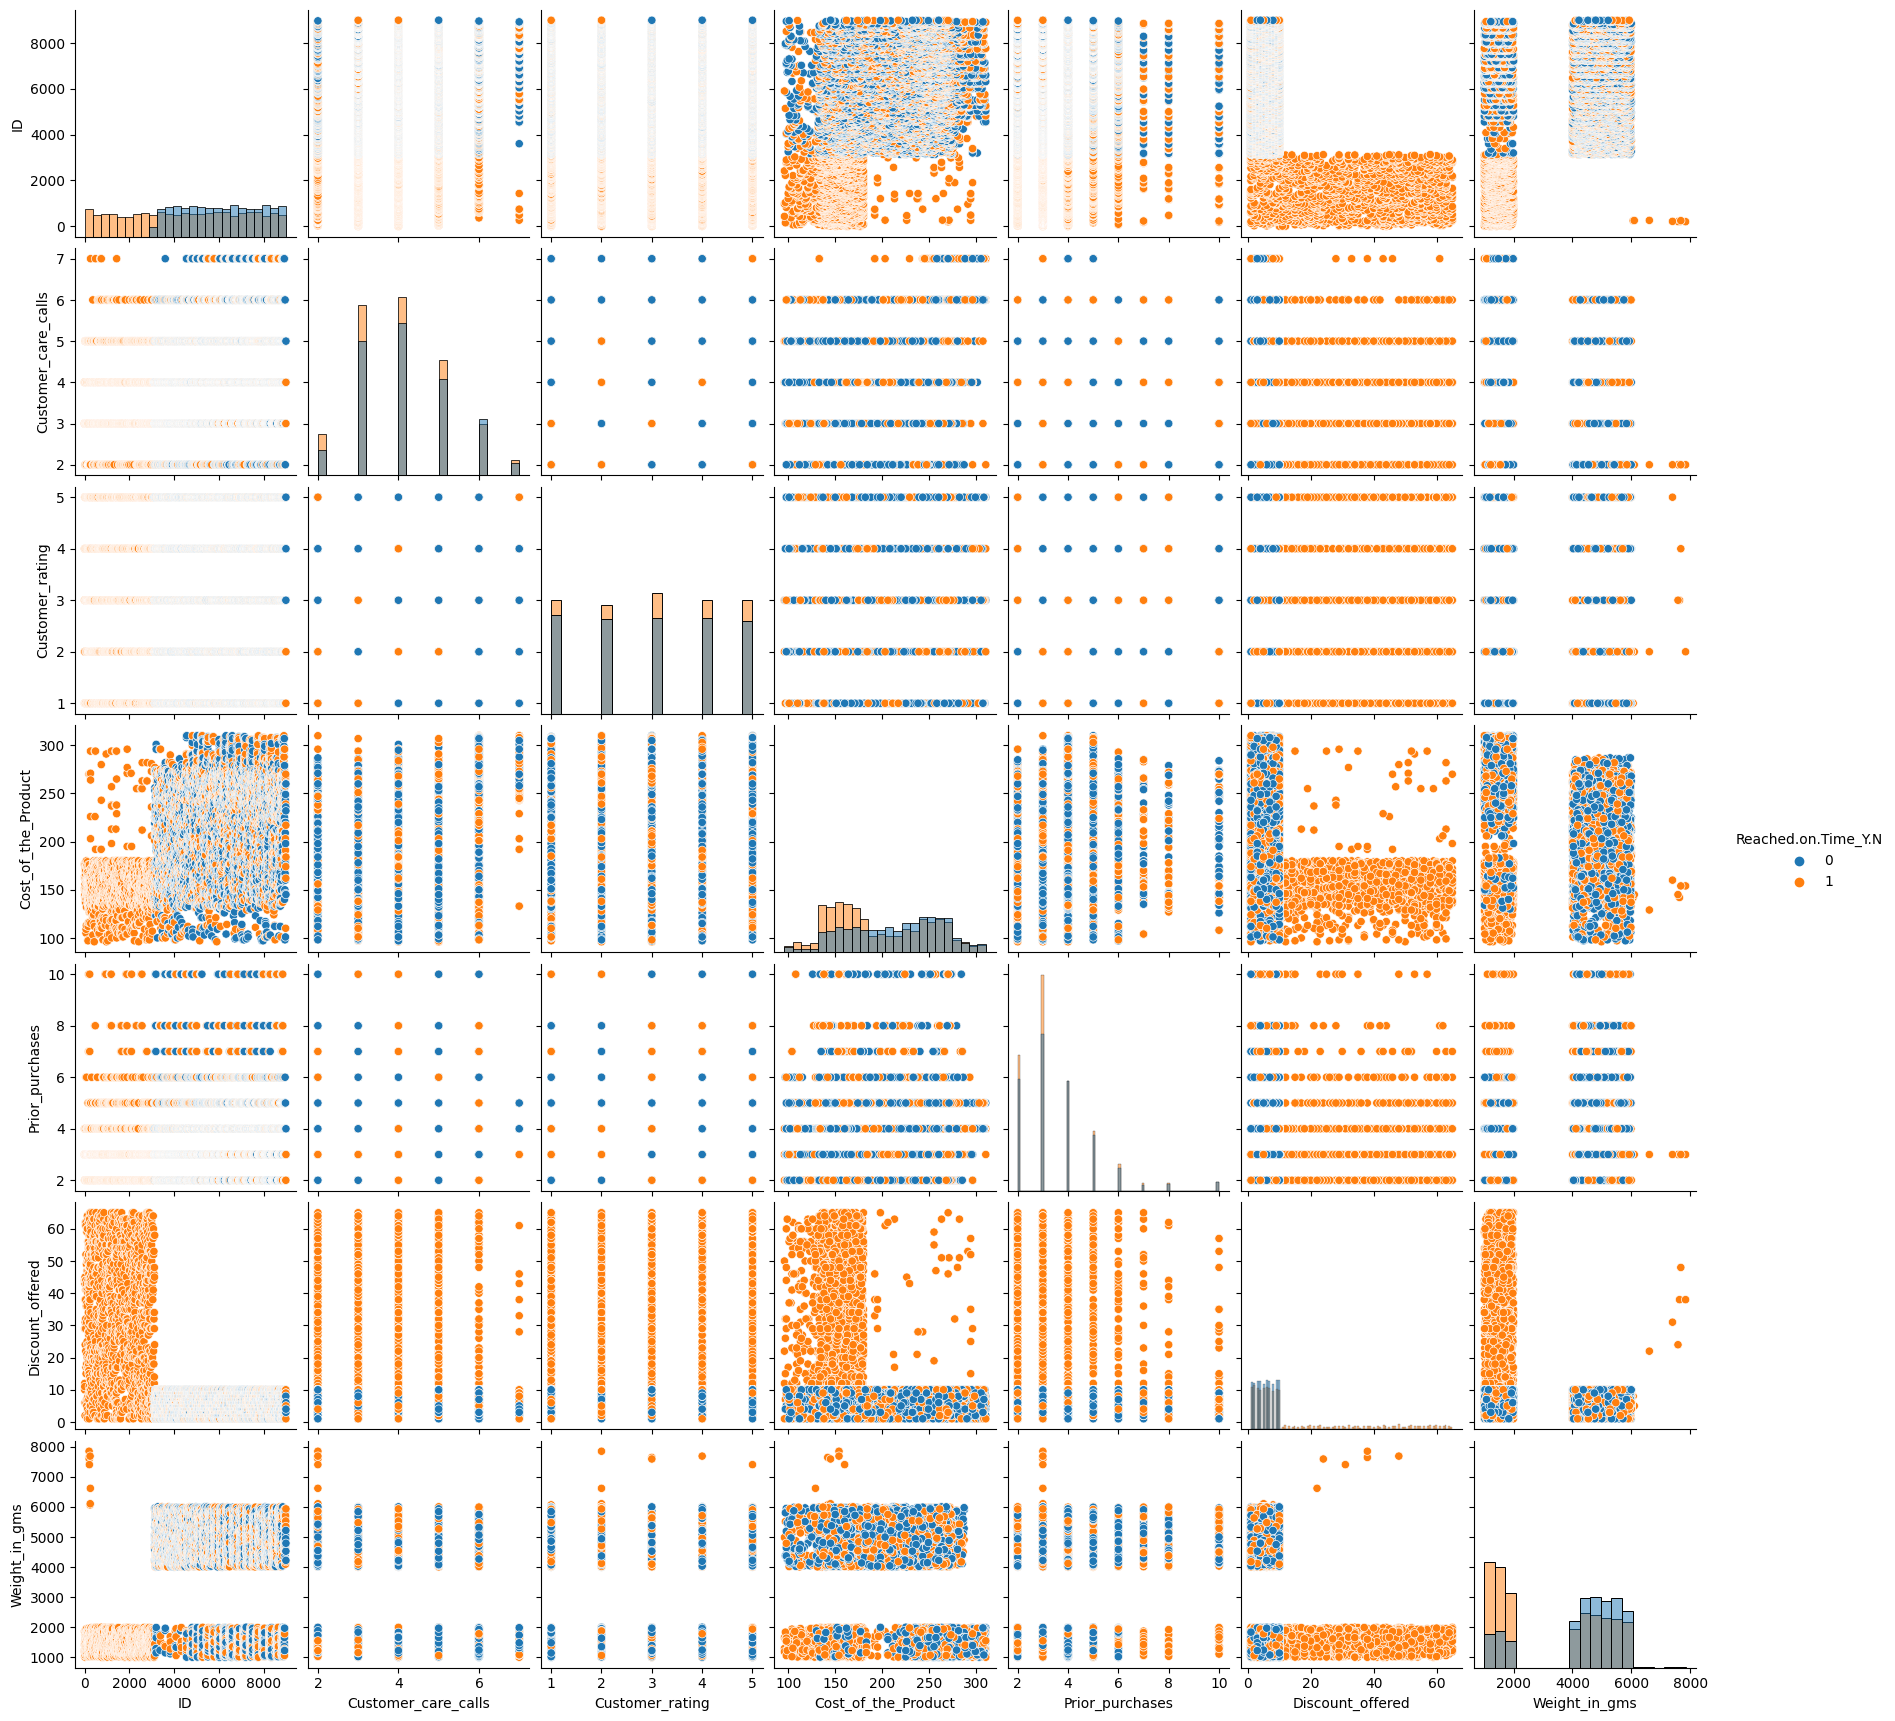

In [102]:
sns.pairplot(datos, hue= "Reached.on.Time_Y.N", diag_kind="hist")
plt.savefig('distribucion_bivariada.png')
plt.show()

## datos de Entrada y datos de salida

### Para los datos de entrada $X$, podremos todos los datos de las columnas a excepción de dos columnas, la columna de pedidos a tiempo y los datos ID, debido que este dato ID es colocado automaticamente como un primary key por la base de datos.
### los datos de salida $Y$ serán los que se predecirán, en este caso los datos de tiempo de pedidos como se muestran a continuación:

In [41]:
X = datos.drop(columns=["Reached.on.Time_Y.N", "ID"])
Y = datos["Reached.on.Time_Y.N"]

### Luego mediante la función train_test_split() separaremos los datos por train y test siendo el de test de un tamaño de 33.3% de los datos originales y los de train de 66.6%

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Luego generaremos un pipeline mediante la función Pipeline() que convierta los datos categoricos en tipo binarios, para escoger las columnas específicas que se aplique esta trasformación usamos la la función ColumnTransformer, con esta escogemos las 4 columnas categóricas. Luego de esto generamos un pipeline que haga una trasformación ordenada; Primero transformando lo anterior mencionado. Luego con todas las columnas hacer una estandarización, luego reducir las dimensiones con la función PCA (explicada anteriormente) y finalmente, aplicar backpropagation con los datos mediante la función MLPClassifier(), donde el parametro asociado a la rata de aprendizaje learning_rate sea adaptativo, es decir que parapasos necesariamente grandes use un valor grande y para pasos muy pequeños cambie a un valor pequeño.

### Finalmente usamos GridSearchCV() para buscar los hiperparámetros más adecuados para el modelo, en este caso analizar cual es la mejor función de activación cuales son los mejores componentes principales y cual es el mejor solucionador de componentes principales.

In [58]:
preprocesamiento_categorico = Pipeline(steps = [("onehot", OneHotEncoder())])

preprocesor = ColumnTransformer([
                                   (
                                    "categorico", preprocesamiento_categorico,
                                   [
                                    "Warehouse_block", "Gender", "Product_importance", "Mode_of_Shipment"                                     
                                    ])
                                ])

param_grid = {
    "MLP__activation": ["identity", "logistic", "tanh", "relu"],
    "pca__n_components": [1,2,3,4,5,6,7,8],
    "pca__svd_solver": ["auto", "full", "arpack", "randomized"]
    
}

pipe = Pipeline(steps = [("Preprocesamiento", preprocesor), ("standarscale", StandardScaler()), ("pca", PCA()),
                         ("MLP", MLPClassifier(verbose=False,learning_rate="adaptive"))],verbose = False)
grid = GridSearchCV(pipe,param_grid=param_grid,verbose=3,cv=2)
grid

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocesamiento',
                                        ColumnTransformer(transformers=[('categorico',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Warehouse_block',
                                                                          'Gender',
                                                                          'Product_importance',
                                                                          'Mode_of_Shipment'])])),
                                       ('standarscale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('MLP',
                                        MLPClassifier(learning_rate='adaptive'))]),
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__hidden_layer_sizes': [(100, 100, 100, 100, 100)],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'pca__svd_solver': ['auto', 'full', 'arpack',
                                             'randomized']},
             verbose=3)

### como se muestra arriba obtenemos el proceso de Pipeline general explicado anteriormente, Procedemos a ajustar los datos mediante la función fit() como se muestra acontinuación:

In [59]:
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=auto;, score=0.542 total time=   5.8s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=auto;, score=0.542 total time=   2.8s
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=full;, score=0.542 total time=   5.2s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=full;, score=0.542 total time=   3.4s
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=arpack;, score=0.542 total time=   2.5s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1,

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocesamiento',
                                        ColumnTransformer(transformers=[('categorico',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Warehouse_block',
                                                                          'Gender',
                                                                          'Product_importance',
                                                                          'Mode_of_Shipment'])])),
                                       ('standarscale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('MLP',
                                        MLPClassifier(learning_rate='adaptive'))]),
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__hidden_layer_sizes': [(100, 100, 100, 100, 100)],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'pca__svd_solver': ['auto', 'full', 'arpack',
                                             'randomized']},
             verbose=3)

### Mediante el método best_estimator_ podemos observer cuales fueron los mejores hiperparámetros de nuestro modelo

In [60]:
grid.best_estimator_

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Warehouse_block', 'Gender',
                                                   'Product_importance',
                                                   'Mode_of_Shipment'])])),
                ('standarscale', StandardScaler()),
                ('pca', PCA(n_components=5, svd_solver='randomized')),
                ('MLP',
                 MLPClassifier(activation='identity',
                               hidden_layer_sizes=(100, 100, 100, 100, 100),
                               learning_rate='adaptive'))])

### Luego procedemos a mirar algunas características estadísticas del resultado de nuestro modelo con los datos de train y test

In [64]:
print(classification_report(Y_train, grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2210
           1       0.00      0.00      0.00      1865

    accuracy                           0.54      4075
   macro avg       0.27      0.50      0.35      4075
weighted avg       0.29      0.54      0.38      4075



/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print(classification_report(Y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1069
           1       0.00      0.00      0.00       939

    accuracy                           0.53      2008
   macro avg       0.27      0.50      0.35      2008
weighted avg       0.28      0.53      0.37      2008



/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Como observamos arriba a pesar de obtener un buen recall en la clase 0 observamos que este modelo es bastante malo, dado que accuracy es muy bajo indicando un posible subfitting, posiblemente debido a los comentarios de alteración de datos antes comentados, ya que no riguen ninguna teoría estadística ab initio al construirse inicialmente y además que dicha alteración muestra que ya no son datos de una realidad que queremos modelar.

## Finalmente, se hace una visualización de la matriz de confusión para el test como para el train

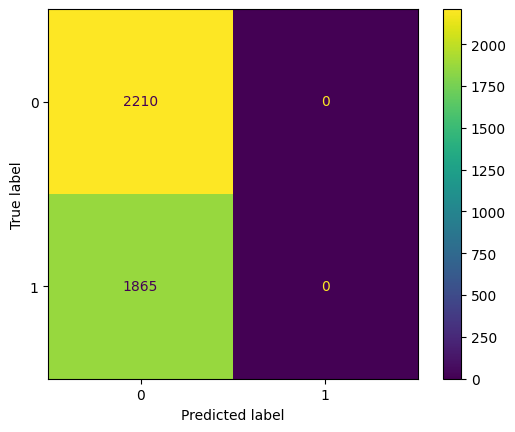

In [104]:
cm = confusion_matrix(Y_train, grid.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

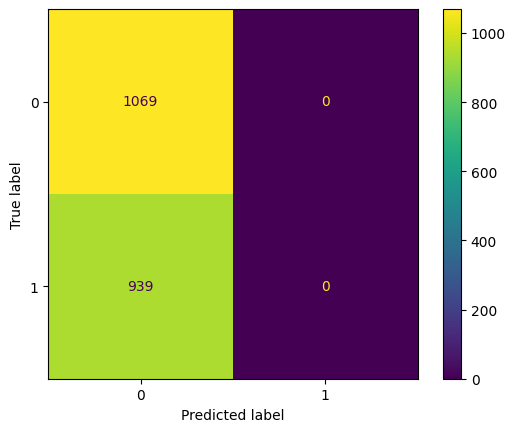

In [105]:
cm = confusion_matrix(Y_test, grid.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### De esto obtenemos que todos el modelo netamente predice la clase 0 aún así no lo sea tal que dicho modelo no es el adecuado a la hora de predecir los pedidos a tiempo

### A pesar de lo anterior aún asi intentamos hacer una predicción de los datos originales de text con la función predict como se muestra a continuación.

In [ ]:
X_salida = datostest.drop(columns=["ID"])

In [ ]:
Y_salida = grid.predict(X_salida)

In [ ]:
Y_salida

In [ ]:
salida = pd.DataFrame({"pred": Y_salida})

In [ ]:
salida.to_csv("haroldlaserna.csv", index = False)